# Retail Sales Analysis

## Project Overview
This project analyzes retail sales data to uncover key trends, top-selling products, seasonal patterns, and regional performance. The goal is to provide actionable insights that can guide inventory management, marketing strategies, and business growth decisions.

### Dataset
- **Source:** Kaggle – Retail Sales Data  
- **Contents:** Product sales, order dates, customer locations, territories, and other relevant details.  

### Goals
1. Identify **top-selling products** to prioritize inventory and marketing efforts.  
2. Analyze **monthly and seasonal sales trends** to optimize promotions and stock planning.  
3. Evaluate **territory-wise performance** to identify high-performing markets and potential growth areas.  
4. Provide **business recommendations** based on the analysis.  

### Steps
1. Load and clean the dataset (handle missing values and correct data types).  
2. Perform exploratory data analysis (EDA) to calculate total sales by product, month, and territory.  
3. Visualize trends using bar charts, line plots, and heatmaps.  
4. Summarize insights and provide actionable recommendations.


## Step 1: Load Dataset
We begin by loading the retail sales dataset into a Pandas DataFrame and inspecting the first few rows to understand the structure and columns.


In [80]:
import pandas as pd
# Load dataset
retail_data = pd.read_csv('C:/Users/lavan/OneDrive/Documents/Retail Sales Analysis/sales_data_sample.csv',encoding='latin1')
# Check the first few rows
print(retail_data.head())


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

## Step 2: Check for Missing Values
We check which columns have missing or null values and plan how to handle them.


In [81]:
# Check for missing values
missing_values = retail_data.isna().sum()
print(missing_values[missing_values>0])

ADDRESSLINE2    2521
STATE           1486
POSTALCODE        76
TERRITORY       1074
dtype: int64


## Step 3: Clean Missing Values
- Dropped `ADDRESSLINE2` as it is not needed.
- Filled missing `STATE` values with 'Unknown'.
- Filled missing `POSTALCODE` values with '00000'.
- Imputed `TERRITORY` based on `COUNTRY`.


In [82]:
# Drop ADDRESSLINE2
retail_data = retail_data.drop(columns=['ADDRESSLINE2'])

# Fill STATE missing with 'Unknown'
retail_data['STATE'] = retail_data['STATE'].fillna('Unknown')

# Fill POSTALCODE missing with '00000'
retail_data['POSTALCODE'] = retail_data['POSTALCODE'].fillna('00000')

# Fill TERRITORY based on COUNTRY
retail_data['TERRITORY'] = retail_data.apply(
    lambda row: 'AMER' if row['COUNTRY'] == 'USA' else ('EMEA' if row['COUNTRY'] in ['France', 'Germany', 'UK'] else 'APAC') 
    if pd.isnull(row['TERRITORY']) else row['TERRITORY'], axis=1
)


## Step 4: Total Sales by Product
We calculate total sales for each product to identify top-selling products.


In [83]:
#Total sales by product
product_sales = retail_data.groupby("PRODUCTCODE")['SALES'].sum().sort_values(ascending=False)
print(product_sales)

PRODUCTCODE
S18_3232    288245.42
S10_1949    191073.03
S10_4698    170401.07
S12_1108    168585.32
S18_2238    154623.95
              ...    
S24_1628     46676.51
S24_2972     46515.92
S24_2022     44667.16
S32_2206     41353.43
S24_3969     33181.66
Name: SALES, Length: 109, dtype: float64


## Step 5: Convert Order Dates
Convert `ORDERDATE` to datetime format and extract `MONTH` and `YEAR` for time-based analysis.


In [84]:
# Convert ORDERDATE to datetime
retail_data['ORDERDATE'] = pd.to_datetime(retail_data['ORDERDATE'])

# Extract month and year (if needed)
retail_data['MONTH'] = retail_data['ORDERDATE'].dt.month
retail_data['YEAR'] = retail_data['ORDERDATE'].dt.year


## Step 6: Monthly Sales
Calculate total sales for each month to observe sales trends over time.


In [85]:
# Total sales per month
monthly_sales = retail_data.groupby('MONTH')['SALES'].sum().sort_values(ascending=False)
print(monthly_sales)

MONTH
11    2118885.67
10    1121215.22
5      923972.56
2      810441.90
1      785874.44
3      754501.39
4      669390.96
8      659310.57
12     634679.12
9      584724.27
7      514875.97
6      454756.78
Name: SALES, dtype: float64


## Step 7: Top 10 Products by Sales
Visualize the top 10 products to highlight the highest revenue-generating products.


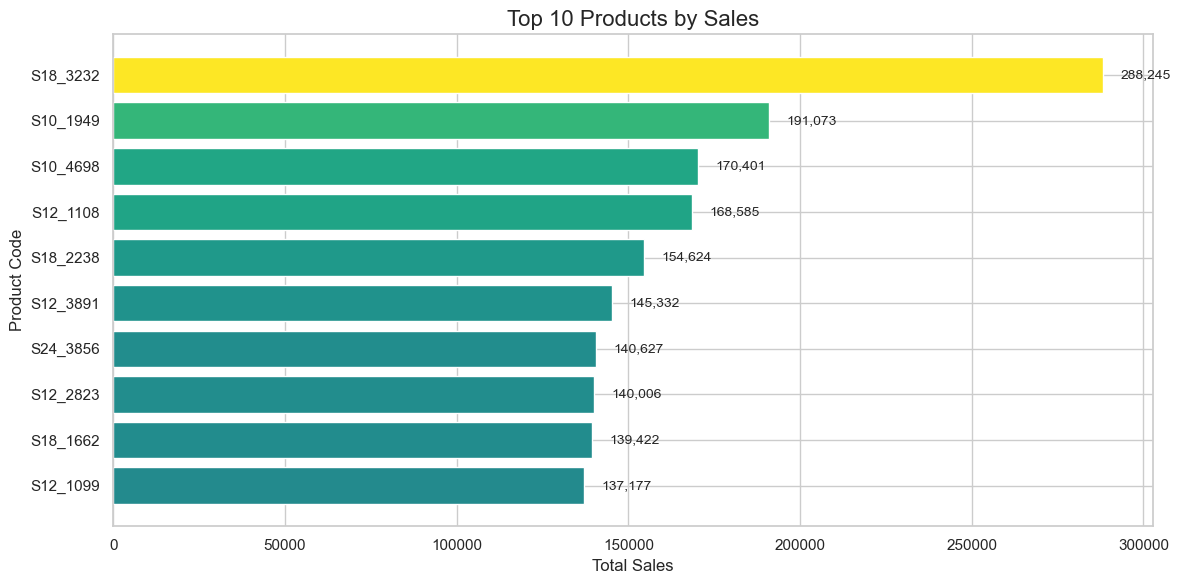

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

top_products = product_sales.head(10).sort_values()


plt.figure(figsize = (12,6))
bars = plt.barh(top_products.index, top_products.values, color=plt.cm.viridis(top_products.values / max(top_products.values)))

# Add labels on bars
for bar in bars:
    plt.text(bar.get_width() + 5000, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():,.0f}', va='center', fontsize=10)

plt.title('Top 10 Products by Sales', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Product Code', fontsize=12)
plt.tight_layout()
plt.show()

## Step 8: Monthly Sales Trend for Top Products
Plot a line chart showing how sales of top products vary over months.


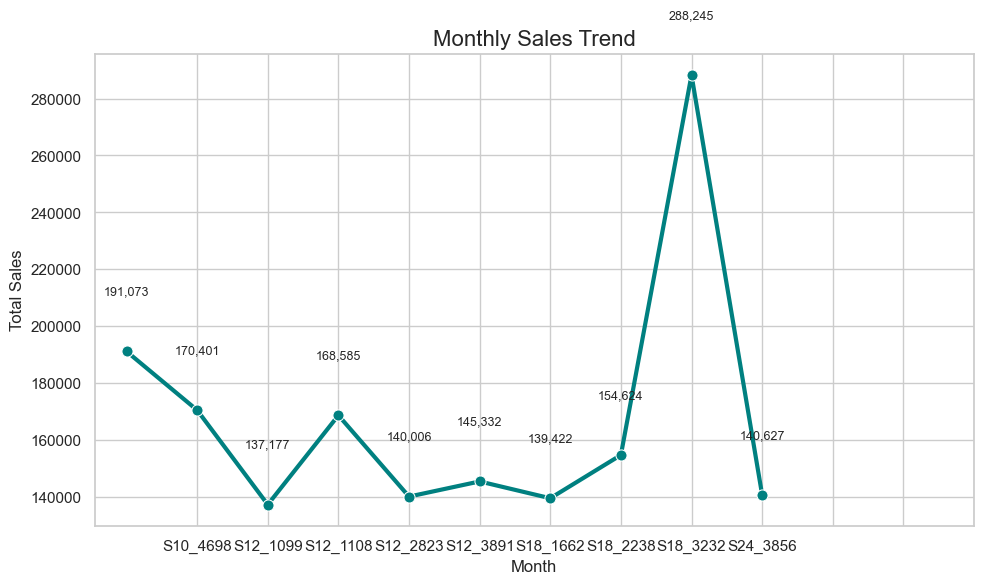

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

monthly_sales_sorted = product_sales.head(10).sort_index()

plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_sales_sorted.index, y=monthly_sales_sorted.values, marker='o', linewidth=3, markersize=8, color='teal')

# Annotate each point with sales value
for month, sales in zip(monthly_sales_sorted.index, monthly_sales_sorted.values):
    plt.text(month, sales + 20000, f'{sales:,.0f}', ha='center', fontsize=9)

# Customizations
plt.xticks(range(1,13))
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.tight_layout()
plt.show()

## Step 9: Overall Monthly Sales Trend
Visualize total sales per month across all products to identify seasonal patterns.


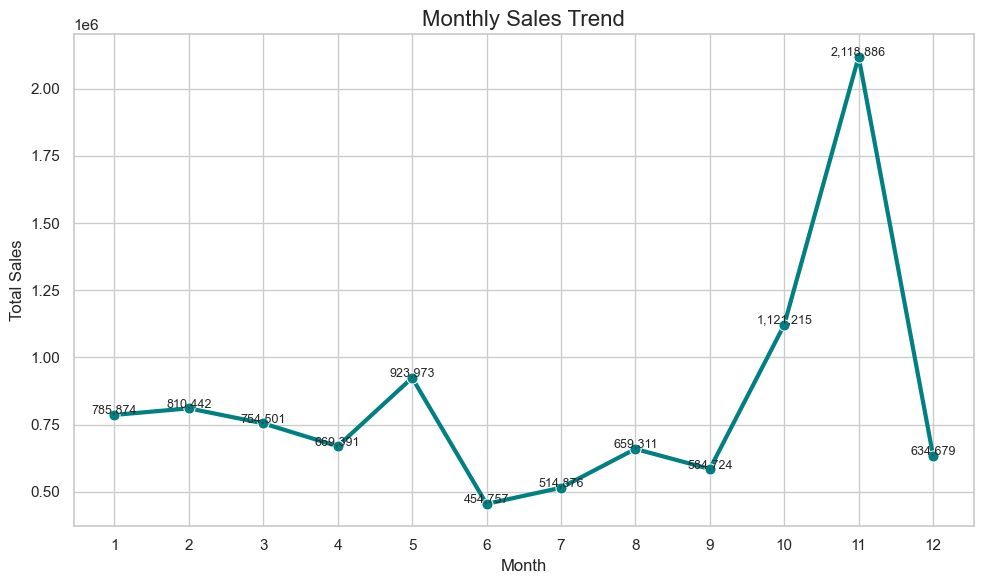

In [88]:
# Monthly sales plot
monthly_sales = retail_data.groupby('MONTH')['SALES'].sum().sort_index()
plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', linewidth=3, markersize=8, color='teal')

# Annotate each point
for month, sales in zip(monthly_sales.index, monthly_sales.values):
    plt.text(month, sales + 5000, f'{sales:,.0f}', ha='center', fontsize=9)

plt.xticks(range(1,13))
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.tight_layout()
plt.show()


## Step 10: Total Sales by Territory
Calculate total sales per territory to find which regions generate the most revenue.


In [89]:
# Total sales by territory
territory_sales = retail_data.groupby('TERRITORY')['SALES'].sum().sort_values(ascending=False)
print(territory_sales)

TERRITORY
EMEA     4979272.41
AMER     3627982.83
APAC      970200.39
Japan     455173.22
Name: SALES, dtype: float64


## Step 11: Visualize Territory Sales
Bar chart showing total sales by territory for easy comparison.


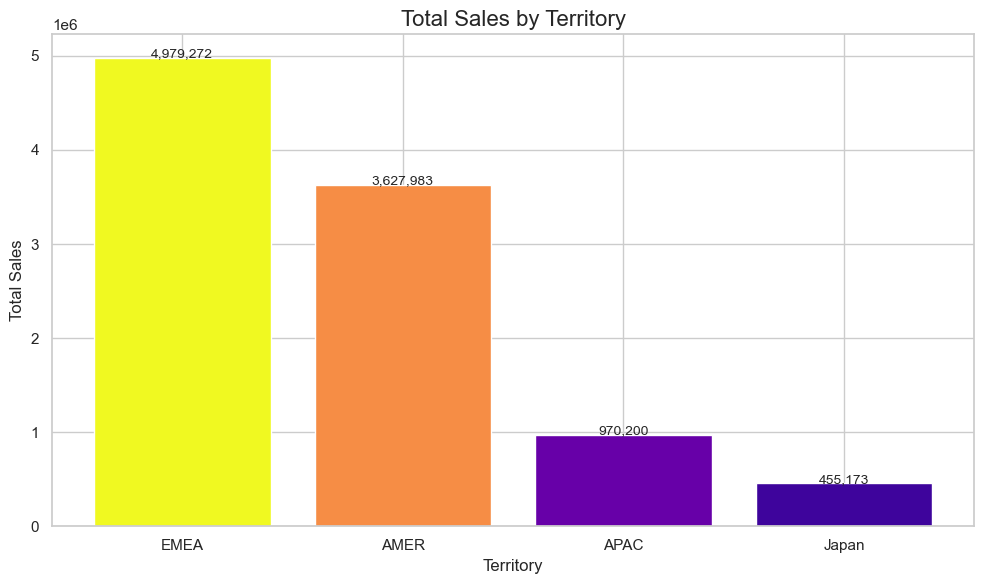

In [90]:

# Plot top territories
plt.figure(figsize=(10,6))
bars = plt.bar(territory_sales.index, territory_sales.values, color=plt.cm.plasma(territory_sales.values / max(territory_sales.values)))

# Add labels on bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5000, f'{bar.get_height():,.0f}', ha='center', fontsize=10)

plt.title('Total Sales by Territory', fontsize=16)
plt.xlabel('Territory', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.tight_layout()
plt.show()


## Step 12: Seasonal Sales Pattern
Line chart showing monthly sales across all territories and products to identify peak and low seasons.


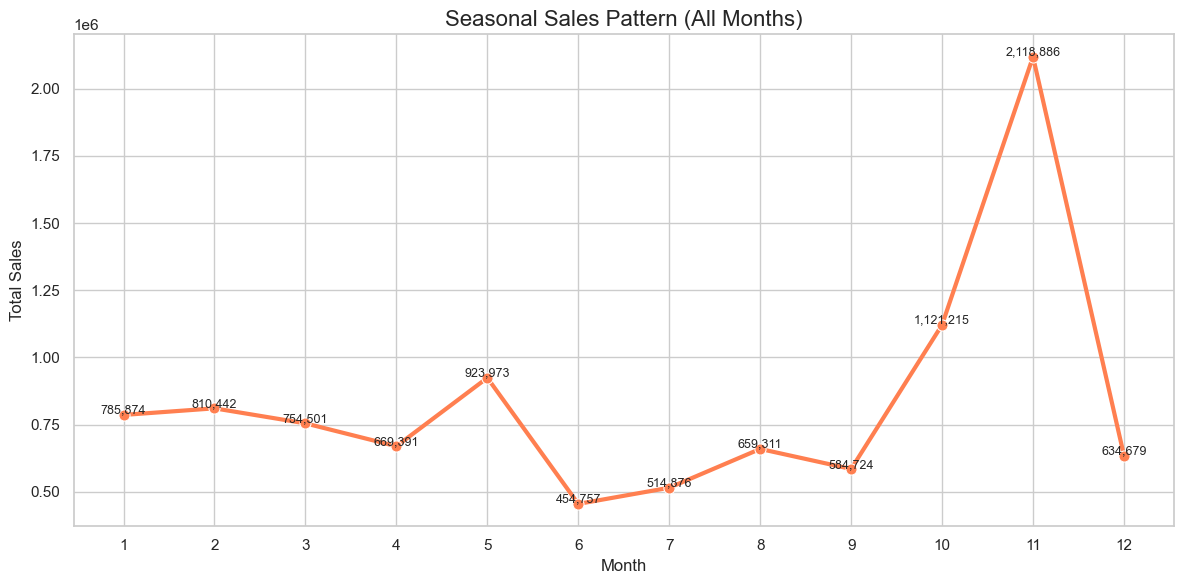

In [91]:
# Total sales per month across all years
monthly_sales = retail_data.groupby('MONTH')['SALES'].sum().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', linewidth=3, markersize=8, color='coral')

# Annotate each point with sales value
for month, sales in zip(monthly_sales.index, monthly_sales.values):
    plt.text(month, sales + 5000, f'{sales:,.0f}', ha='center', fontsize=9)

plt.xticks(range(1,13))
plt.title('Seasonal Sales Pattern (All Months)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.tight_layout()
plt.show()


## Conclusion & Insights

### Key Findings
- **Top-Selling Products:** The analysis identified the top 10 products by total sales, helping prioritize inventory and marketing strategies.  
- **Monthly Sales Trends:** Overall sales peak during specific months, revealing clear seasonal patterns. Planning promotions and stock ahead of these months can maximize revenue.  
- **Territory Performance:**  
  - **EMEA** leads in sales with over ₹4.97M, making it the strongest market.  
  - **AMER** follows with ₹3.63M, showing solid performance in the Americas.  
  - **APAC** and **Japan** contribute less, indicating potential areas for growth.  

### Business Recommendations
- Focus marketing campaigns and stock planning on **EMEA and AMER** during peak sales months.  
- Explore growth strategies for **APAC and Japan** to increase market share.  
- Ensure **top-selling products** are well-stocked ahead of high-demand periods.  

### Next Steps / Future Work
- Analyze **year-over-year trends** to capture long-term seasonality.  
- Build **predictive sales models** to forecast demand for products and regions.  
- Incorporate **customer segmentation** to tailor promotions and improve sales efficiency.  

### Conclusion
This analysis highlights key sales trends, top-performing products, and high-revenue territories. Leveraging these insights can help optimize inventory, marketing strategies, and regional growth opportunities.
